In [7]:
pip install mplsoccer

   ---------------------------------------- 0.0/85.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/85.8 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/85.8 kB ? eta -:--:--
   -------------- ------------------------- 30.7/85.8 kB 435.7 kB/s eta 0:00:01
   -------------------------------------- - 81.9/85.8 kB 919.0 kB/s eta 0:00:01
   ---------------------------------------- 85.8/85.8 kB 693.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

In [21]:
data = pd.read_csv('ronaldo_shots_after_2015.csv')

In [22]:
data.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,40792,62,MissedShots,0.722,0.304,0.008944,Cristiano Ronaldo,a,2371,OpenPlay,2014,LeftFoot,5609,Atletico Madrid,Real Madrid,4,0,2015-02-07 15:00:00,Daniel Carvajal,Pass
1,41104,12,ShotOnPost,0.825,0.460,0.063442,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5620,Real Madrid,Deportivo La Coruna,2,0,2015-02-14 17:00:00,Gareth Bale,Pass
2,41110,24,SavedShot,0.899,0.825,0.065627,Cristiano Ronaldo,h,2371,DirectFreekick,2014,RightFoot,5620,Real Madrid,Deportivo La Coruna,2,0,2015-02-14 17:00:00,NaN,Standard
3,41113,35,MissedShots,0.927,0.545,0.140089,Cristiano Ronaldo,h,2371,OpenPlay,2014,Head,5620,Real Madrid,Deportivo La Coruna,2,0,2015-02-14 17:00:00,Gareth Bale,Cross
4,41121,61,MissedShots,0.775,0.539,0.096650,Cristiano Ronaldo,h,2371,DirectFreekick,2014,RightFoot,5620,Real Madrid,Deportivo La Coruna,2,0,2015-02-14 17:00:00,NaN,Standard


In [23]:
data['X']=data['X']*100
data['Y']=data['Y']*100

In [24]:
total_shots= data.shape[0]
total_goals=data[data['result']=='Goal'].shape[0]
total_xGoals=data['xG'].sum()
xGoal_per_shot= total_xGoals/total_shots
points_average_distance=data['X'].mean()
actual_average_distance=120-(data['X']*1.2).mean()

In [25]:
actual_average_distance

17.01924074827319

In [26]:
bg_color='#0C0D0E'

In [27]:
import matplotlib.font_manager as font_manager
font_path="E:\Projects\Footballer_Shotmap\Arvo-Regular.ttf"
font_props=font_manager.FontProperties(fname=font_path)

Text(0.8, 0, '0.15')

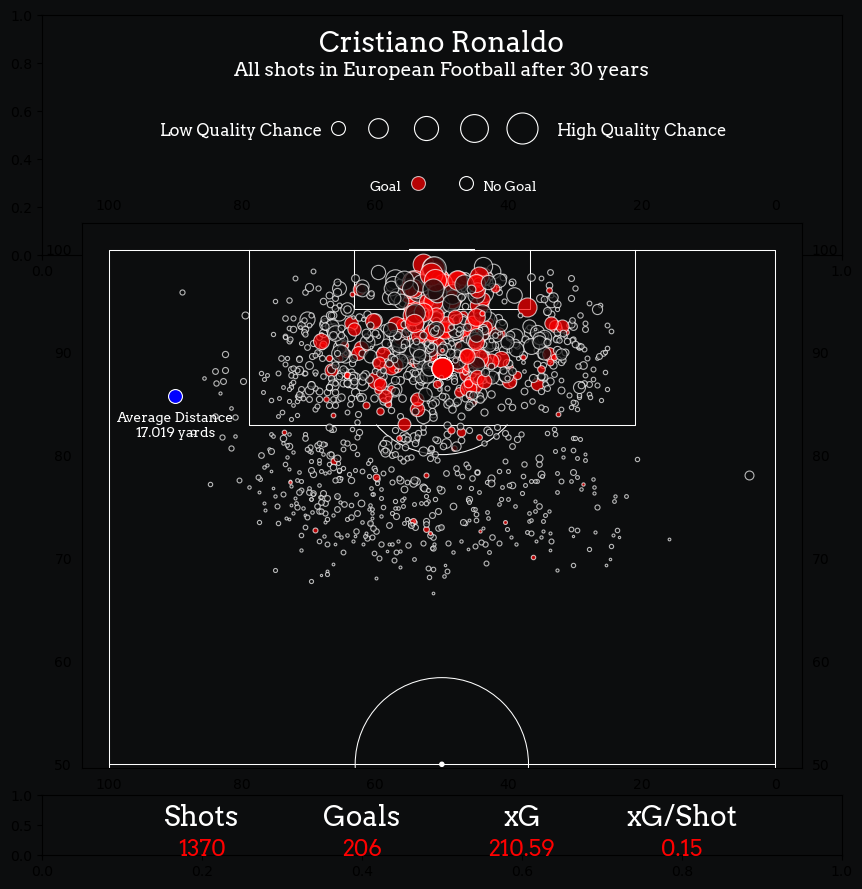

In [73]:
fig=plt.figure(figsize=(8,12))
fig.patch.set_facecolor(bg_color)

ax1=fig.add_axes([0,.7,1,.2])
ax1.set_facecolor(bg_color)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.text(
    x=.5,
    y=.85,
    s='Cristiano Ronaldo',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)
ax1.text(
    x=.5,
    y=.75,
    s='All shots in European Football after 30 years',
    fontsize=14,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)
ax1.text(
    x=.25,
    y=.5,
    s='Low Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

x_values = [0.37, 0.42, 0.48, 0.54, 0.60]
sizes = [100, 200, 300, 400, 500]
for x, s in zip(x_values, sizes):
    ax1.scatter(
        x=x,
        y=0.53,  
        s=s,
        color=bg_color,
        edgecolor='white',
        linewidth=0.8
    )

ax1.text(
    x=.75,
    y=.5,
    s='High Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='red', 
    edgecolor='white', 
    linewidth=.8,
    alpha=.7
)
ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=bg_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    fontproperties=font_props, 
    color='white', 
    ha='left'
)

ax2=fig.add_axes([.05,.25,.9,.5])
ax2.set_facecolor(bg_color)

pitch=VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=bg_color,
    pad_bottom=.5,
    line_color='white',
    linewidth=.75,
    axis=True,
    label=True
)
pitch.draw(ax=ax2)

ax2.scatter(x=90,y=points_average_distance,s=100,color='blue',edgecolor='white',linewidth=.8)
ax2.text(
    x=90,
    y=points_average_distance-4,
    s=f'Average Distance\n{actual_average_distance:.3f} yards',
    fontsize=10,fontproperties=font_props,
    color='white', ha='center'
)


for x in data.to_dict(orient='records'):
    pitch.scatter(
        x['X'],
        x['Y'],
        s=300*x['xG'],
        color='red' if x['result'] =='Goal' else bg_color,
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )


ax3=fig.add_axes([0,.2,1,.05])
ax3.set_facecolor(bg_color)

ax3.text(x=.20,y=.5,s='Shots',fontsize=20,fontproperties=font_props,fontweight='bold',color='white',ha='center')
ax3.text(x=.20,y=0,s=f'{total_shots}',fontsize=16,fontproperties=font_props,color='red',ha='center')

ax3.text(x=.40,y=.5,s='Goals',fontsize=20,fontproperties=font_props,fontweight='bold',color='white',ha='center')
ax3.text(x=.40,y=0,s=f'{total_goals}',fontsize=16,fontproperties=font_props,color='red',ha='center')

ax3.text(x=.60,y=.5,s='xG',fontsize=20,fontproperties=font_props,fontweight='bold',color='white',ha='center')
ax3.text(x=.60,y=0,s=f'{total_xGoals:.2f}',fontsize=16,fontproperties=font_props,color='red',ha='center')

ax3.text(x=.80,y=.5,s='xG/Shot',fontsize=20,fontproperties=font_props,fontweight='bold',color='white',ha='center')
ax3.text(x=.80,y=0,s=f'{xGoal_per_shot:.2f}',fontsize=16,fontproperties=font_props,color='red',ha='center')